In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir('drive/My Drive/py-codes/')

FileNotFoundError: ignored

In [ ]:
os.getcwd()

'/content/drive/My Drive/py-codes'

In [ ]:
from google.colab import files
files.upload()

Saving cement1.csv to cement1 (1).csv


{'cement1.csv': b'cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,age,concrete_compressive_strength\r\n540,0,0,162,2.5,1040,28,79.99\r\n540,0,0,162,2.5,1055,28,61.89\r\n332.5,142.5,0,228,0,932,270,40.27\r\n332.5,142.5,0,228,0,932,365,41.05\r\n198.6,132.4,0,192,0,978.4,360,44.3\r\n266,114,0,228,0,932,90,47.03\r\n380,95,0,228,0,932,365,43.7\r\n380,95,0,228,0,932,28,36.45\r\n266,114,0,228,0,932,28,45.85\r\n475,0,0,228,0,932,28,39.29\r\n198.6,132.4,0,192,0,978.4,90,38.07\r\n198.6,132.4,0,192,0,978.4,28,28.02\r\n427.5,47.5,0,228,0,932,270,43.01\r\n190,190,0,228,0,932,90,42.33\r\n304,76,0,228,0,932,28,47.81\r\n380,0,0,228,0,932,90,52.91\r\n139.6,209.4,0,192,0,1047,90,39.36\r\n342,38,0,228,0,932,365,56.14\r\n380,95,0,228,0,932,90,40.56\r\n475,0,0,228,0,932,180,42.62\r\n427.5,47.5,0,228,0,932,180,41.84\r\n139.6,209.4,0,192,0,1047,28,28.24\r\n139.6,209.4,0,192,0,1047,3,8.06\r\n139.6,209.4,0,192,0,1047,180,44.21\r\n380,0,0,228,0,932,365,52.52\r\n380,0,0,228,0,932,270,53

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import fancyimpute
from fancyimpute import KNN
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from xgboost import XGBRegressor
import xgboost as xgb

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.externals import joblib

In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
training = pd.read_csv('cement1.csv')

In [ ]:
training.shape

(1030, 8)

In [ ]:
training.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,365.000000,82.600000


In [ ]:
training.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,360,44.30


In [ ]:
training.dtypes



cement                           float64
blast_furnace_slag               float64
fly_ash                          float64
water                            float64
superplasticizer                 float64
coarse_aggregate                 float64
age                                int64
concrete_compressive_strength    float64
dtype: object

MISSING VALUE ANALYSIS

In [ ]:
mising_value = pd.DataFrame(training.isnull().sum())

In [ ]:
mising_value

,0
cement,0
blast_furnace_slag,0
fly_ash,0
water,0
superplasticizer,0
coarse_aggregate,0
age,0
concrete_compressive_strength,0


In [ ]:
mising_value = mising_value.rename(columns = {'index': 'Variable', 0: 'Missing_percentage'})

In [ ]:
mising_value['Missing_percentage'] = (mising_value['Missing_percentage']/len(training))*100

In [ ]:
mising_value['Missing_percentage']

cement                           0.0
blast_furnace_slag               0.0
fly_ash                          0.0
water                            0.0
superplasticizer                 0.0
coarse_aggregate                 0.0
age                              0.0
concrete_compressive_strength    0.0
Name: Missing_percentage, dtype: float64

NO MISSING VALUES FOUND

OUTLIER ANALYSIS 


In [ ]:
col_names=["cement","blast_furnace_slag","fly_ash","water","superplasticizer","coarse_aggregate","age","concrete_compressive_strength"]

In [ ]:
col_names

['cement',
 'blast_furnace_slag',
 'fly_ash',
 'water',
 'superplasticizer',
 'coarse_aggregate',
 'age',
 'concrete_compressive_strength']

In [ ]:
training.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,360,44.30


DETERMINATION OF INTERQUARTILE RANGE (iqr)

In [ ]:
def outlier_analysis(col_names):
    print(col_names)
    ''' calculating outlier indices and replacing them with NA  '''
    #Extract quartiles
    q75, q25 = np.percentile(training[col_names], [75 ,25])
    print(q75,q25)
    #Calculate IQR
    iqr = q75 - q25
    #Calculate inner and outer fence
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    print(minimum,maximum)
    #Replace with NA
    training.loc[training[col_names] < minimum,col_names] = np.nan
    training.loc[training[col_names] > maximum,col_names] = np.nan

In [ ]:
outlier_analysis('cement')

cement
350.0 192.375
-44.0625 586.4375


In [ ]:
mising_value=pd.DataFrame(training.isnull().sum())

In [ ]:
mising_value = mising_value.rename(columns = {'index': 'Variable', 0: 'Missing_percentage'})


In [ ]:
mising_value

,Missing_percentage
cement,0
blast_furnace_slag,0
fly_ash,0
water,0
superplasticizer,0
coarse_aggregate,0
age,0
concrete_compressive_strength,0


In [ ]:
mising_value['Missing_percentage'] = (mising_value['Missing_percentage']/len(training))*100

In [ ]:
mising_value['Missing_percentage']

cement                           0.0
blast_furnace_slag               0.0
fly_ash                          0.0
water                            0.0
superplasticizer                 0.0
coarse_aggregate                 0.0
age                              0.0
concrete_compressive_strength    0.0
Name: Missing_percentage, dtype: float64

In [ ]:
df=training.copy()
training=df.copy()

In [ ]:
training.copy()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,360,44.30
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,28,32.77


In [ ]:
df_corr = training.loc[:,col_names]

In [ ]:
df_corr

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,360,44.30
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,28,32.77


**FEATURE SELECTION(CORRELATION ANALYSIS)**

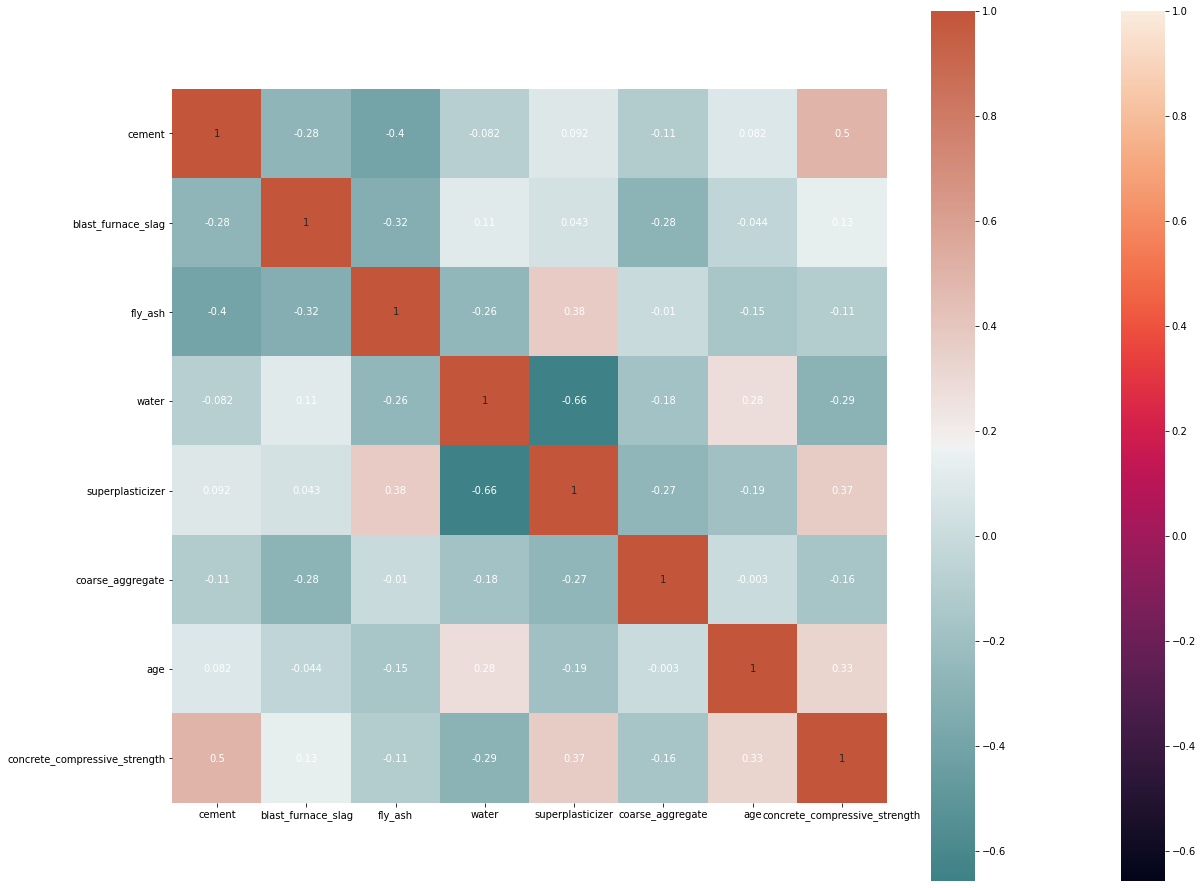

In [ ]:
#Set the width and hieght of the plot
fun, ax = plt.subplots(figsize=(20, 16))

#Generate correlation matrix
cor_mat = df_corr.corr() 
sns.heatmap(df_corr.corr(), annot = True)

#Plot using seaborn library
sns.heatmap(cor_mat, mask=np.zeros_like(cor_mat, dtype=np.bool), cmap=sns.diverging_palette(200, 20, as_cmap=True),
            square=True, ax=ax)

In [ ]:
training.shape

(1030, 8)

### **FEATURE SCALING**
**(Standardization)**

In [ ]:
for i in col_names:
    print(i)
    training[i] = (training[i] - min(training[i]))/(max(training[i]) - min(training[i]))

cement
blast_furnace_slag
fly_ash
water
superplasticizer
coarse_aggregate
age
concrete_compressive_strength


In [ ]:
training.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,age,concrete_compressive_strength
0,1.000000,0.000000,0.0,0.321086,0.07764,0.694767,0.074176,0.967485
1,1.000000,0.000000,0.0,0.321086,0.07764,0.738372,0.074176,0.741996
2,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.739011,0.472655
3,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,1.000000,0.482372
4,0.220548,0.368392,0.0,0.560703,0.00000,0.515698,0.986264,0.522860


In [ ]:
df=training.copy()
training=df.copy()

In [ ]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,age,concrete_compressive_strength
0,1.000000,0.000000,0.0,0.321086,0.07764,0.694767,0.074176,0.967485
1,1.000000,0.000000,0.0,0.321086,0.07764,0.738372,0.074176,0.741996
2,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.739011,0.472655
3,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,1.000000,0.482372
4,0.220548,0.368392,0.0,0.560703,0.00000,0.515698,0.986264,0.522860


In [ ]:
training.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,age,concrete_compressive_strength
0,1.000000,0.000000,0.0,0.321086,0.07764,0.694767,0.074176,0.967485
1,1.000000,0.000000,0.0,0.321086,0.07764,0.738372,0.074176,0.741996
2,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.739011,0.472655
3,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,1.000000,0.482372
4,0.220548,0.368392,0.0,0.560703,0.00000,0.515698,0.986264,0.522860


In [ ]:
Sample_Index = np.random.rand(len(training)) < 0.8

train = training [Sample_Index]
test = training [~Sample_Index]

In [ ]:
test.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,age,concrete_compressive_strength
1,1.000000,0.000000,0.0,0.321086,0.07764,0.738372,0.074176,0.741996
5,0.374429,0.317195,0.0,0.848243,0.00000,0.380814,0.244505,0.556871
11,0.220548,0.368392,0.0,0.560703,0.00000,0.515698,0.074176,0.320045
12,0.743151,0.132165,0.0,0.848243,0.00000,0.380814,0.739011,0.506790
15,0.634703,0.000000,0.0,0.848243,0.00000,0.380814,0.244505,0.630123


In [ ]:
train.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,age,concrete_compressive_strength
0,1.000000,0.000000,0.0,0.321086,0.07764,0.694767,0.074176,0.967485
2,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.739011,0.472655
3,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,1.000000,0.482372
4,0.220548,0.368392,0.0,0.560703,0.00000,0.515698,0.986264,0.522860
6,0.634703,0.264329,0.0,0.848243,0.00000,0.380814,1.000000,0.515386


In [ ]:
train_cols = training.columns[1:8]

LINEAR REGRESSION

In [ ]:

#Import libraries for LR
import statsmodels.api as sm

# Train the model using the training sets
model = sm.OLS(train.iloc[:,7], train.iloc[:,0:7]).fit()

In [ ]:
# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                      
==================================================================================================
Dep. Variable:     concrete_compressive_strength   R-squared (uncentered):                   0.926
Model:                                       OLS   Adj. R-squared (uncentered):              0.925
Method:                            Least Squares   F-statistic:                              1437.
Date:                           Tue, 30 Mar 2021   Prob (F-statistic):                        0.00
Time:                                   06:54:56   Log-Likelihood:                          511.69
No. Observations:                            813   AIC:                                     -1009.
Df Residuals:                                806   BIC:                                     -976.5
Df Model:                                      7                                                  
Covariance Type:                       nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
cement                 0.6479      0.024     27.543      0.000       0.602       0.694
blast_furnace_slag     0.4364      0.024     18.504      0.000       0.390       0.483
fly_ash                0.2036      0.021      9.919      0.000       0.163       0.244
water                 -0.2565      0.027     -9.514      0.000      -0.309      -0.204
superplasticizer       0.1574      0.036      4.339      0.000       0.086       0.229
coarse_aggregate       0.0773      0.017      4.634      0.000       0.045       0.110
age                    0.5216      0.028     18.609      0.000       0.467       0.577
==============================================================================
Omnibus:                        9.511   Durbin-Watson:                   1.337
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.665
Skew:                          -0.267   Prob(JB):                      0.00797
Kurtosis:                       2.985   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# make the predictions by the model
predictions_LR = model.predict(test.iloc[:,0:7]) 



In [ ]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape
#Calculate MAPE
MAPE(test.iloc[:,7], predictions_LR)


36.7276500823729

In [ ]:
training.head(5)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


DECISION TREE

In [ ]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
training.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
training,testing=train_test_split(training, test_size=0.2)

In [ ]:
Sample_Index = np.random.rand(len(training)) < 0.8

train = training [Sample_Index]
test = training [~Sample_Index]

In [ ]:

fit_DT = DecisionTreeRegressor(max_depth=10).fit(train.iloc[:,0:7], train.iloc[:,7])


In [ ]:
#Apply model on test data
predictions_DT = fit_DT.predict(test.iloc[:,0:7])

In [ ]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

MAPE(test.iloc[:,7], predictions_DT)


18.45811981924519

**RANDOM FOREST**



In [ ]:
training.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,age,concrete_compressive_strength
7,0.634703,0.264329,0.000000,0.848243,0.000000,0.380814,0.074176,0.425065
494,0.650685,0.055648,0.469765,0.281150,0.444099,0.398256,0.151099,0.672854
601,0.541096,0.000000,0.000000,0.600639,0.000000,0.485465,0.074176,0.370126
3,0.526256,0.396494,0.000000,0.848243,0.000000,0.380814,1.000000,0.482372
606,0.305936,0.000000,0.000000,0.576677,0.000000,0.485465,0.035714,0.130933


In [ ]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,age,concrete_compressive_strength
0,1.000000,0.000000,0.0,0.321086,0.07764,0.694767,0.074176,0.967485
1,1.000000,0.000000,0.0,0.321086,0.07764,0.738372,0.074176,0.741996
2,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.739011,0.472655
3,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,1.000000,0.482372
4,0.220548,0.368392,0.0,0.560703,0.00000,0.515698,0.986264,0.522860


In [ ]:
training=df.copy()

In [ ]:
training.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,age,concrete_compressive_strength
0,1.000000,0.000000,0.0,0.321086,0.07764,0.694767,0.074176,0.967485
1,1.000000,0.000000,0.0,0.321086,0.07764,0.738372,0.074176,0.741996
2,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.739011,0.472655
3,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,1.000000,0.482372
4,0.220548,0.368392,0.0,0.560703,0.00000,0.515698,0.986264,0.522860


In [ ]:
train_cols = training.columns[1:8]

In [ ]:
X = training.values[:, 0:7]
Y = training.values[:,7]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [ ]:
def rmsle(y,y_):
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))
def scores(y, y_):
    print('r square  ', metrics.r2_score(y, y_))
    print('Adjusted r square:{}'.format(1 - (1-metrics.r2_score(y, y_))*(len(y)-1)/(len(y)-X_train.shape[1]-1)))
    print('MAPE:{}'.format(np.mean(np.abs((y - y_) / y))*100))
    print('MSE:', metrics.mean_squared_error(y, y_))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_))) 
def test_scores(model):
    print('************* TRAINING DATA RESULTS ************ ')
    print()
    #Predicting result on Training data
    y_pred = model.predict(X_train)
    scores(y_train,y_pred)
    print('RMSLE:',rmsle(y_train,y_pred))
    print()
    print('********* TEST DATA RESULTS **********')
    print()
    # Evaluating on Test Set
    y_pred = model.predict(X_test)
    scores(y_test,y_pred)
    print('RMSLE:',rmsle(y_test,y_pred))

In [ ]:
# Create the random grid
random_grid = {'n_estimators': range(100,500,100),
               'max_depth': range(5,20,1),
               'min_samples_leaf':range(2,5,1),
              'max_features':['auto','sqrt','log2'],
              'bootstrap': [True, False],
              'min_samples_split': range(2,5,1)}
# Instantiate a Decision Forest classifier: Forest
Forest = RandomForestRegressor()

# Instantiate the gridSearchCV object: Forest_cv
Forest_cv = RandomizedSearchCV(Forest, random_grid, cv=5)

# Fit it to the data
Forest_cv.fit(X, Y)

# Print the tuned parameters and score
print("Tuned Random Forest Parameters: {}".format(Forest_cv.best_params_))
print("Best score is {}".format(Forest_cv.best_score_))

Tuned Random Forest Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 16, 'bootstrap': True}
Best score is 0.40248113763274257


[0.34584916 0.08661102 0.01682031 0.1113574  0.06892844 0.02131146
 0.3491222 ]


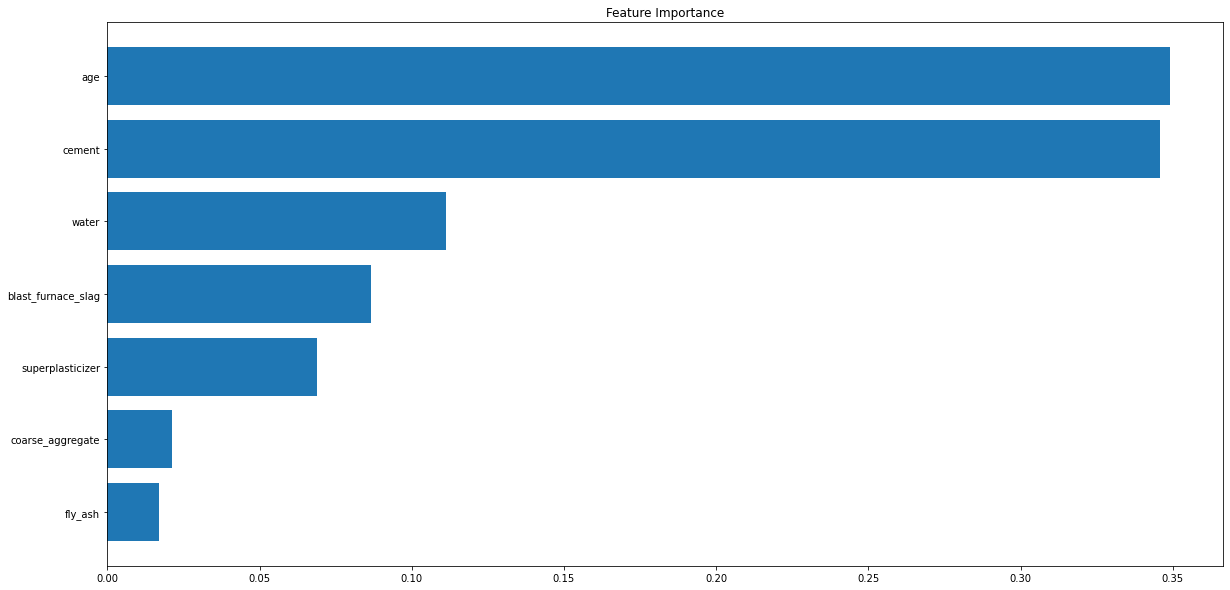

************* TRAINING DATA RESULTS ************ 

r square   0.9463864646436801
Adjusted r square:0.9459265446099863
MAPE:inf
MSE: 0.0023856773350469044
RMSE: 0.04884339602286991
RMSLE: 0.03336809919410482

********* TEST DATA RESULTS **********

r square   0.883277270373369
Adjusted r square:0.8791507092249528
MAPE:16.297094435796478
MSE: 0.0044065069550060345
RMSE: 0.0663815257056211
RMSLE: 0.046854149559842316


In [ ]:
# Instantiate a Forest regressor: Forest
Forest = RandomForestRegressor(n_estimators=100, min_samples_split= 2, min_samples_leaf=4, max_features='auto', max_depth=9, bootstrap=True)

# Fit the regressor to the data
Forest.fit(X_train,y_train)

# Compute and print the coefficients
Forest_features = Forest.feature_importances_
print(Forest_features)

# Sort feature importances in descending order
indices = np.argsort(Forest_features)[::1]

# Rearrange feature names so they match the sorted feature importances
names = [test.columns[i] for i in indices]

# Creating plot
fig = plt.figure(figsize=(20,10))
plt.title("Feature Importance")

# Add horizontal bars
plt.barh(range(pd.DataFrame(X_train).shape[1]),Forest_features[indices],align = 'center')
plt.yticks(range(pd.DataFrame(X_train).shape[1]), names)
plt.savefig('Random forest feature importance')
plt.show()# Make predictions
test_scores(Forest)